<a href="https://colab.research.google.com/github/jigglypufflazybaby/deep-learning-lab/blob/main/prac_8_autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32')/ 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Reshape data to add a channel dimension (required by Conv2D layers)
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [5]:
# Define the encoder architecture
input_img = Input(shape=(28, 28, 1))

In [6]:
# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

In [7]:
# Define the decoder architecture
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [8]:
# Define the autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [9]:
# Train the autoencoder
history = autoencoder.fit(x_train, x_train,epochs=25,batch_size=256,shuffle=True,validation_data=(x_test, x_test))

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - loss: 0.4200 - val_loss: 0.1754
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1673 - val_loss: 0.1475
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1440 - val_loss: 0.1344
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1334 - val_loss: 0.1269
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1268 - val_loss: 0.1217
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1222 - val_loss: 0.1181
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1189 - val_loss: 0.1153
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1161 - val_loss: 0.1132
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1141 - val_loss: 0.1116
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1125 - val_loss: 0.1101
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1109 - val_loss: 0.1088
Epoch 12/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/st

In [10]:
# Encode and decode some imagesfor visualization
encoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


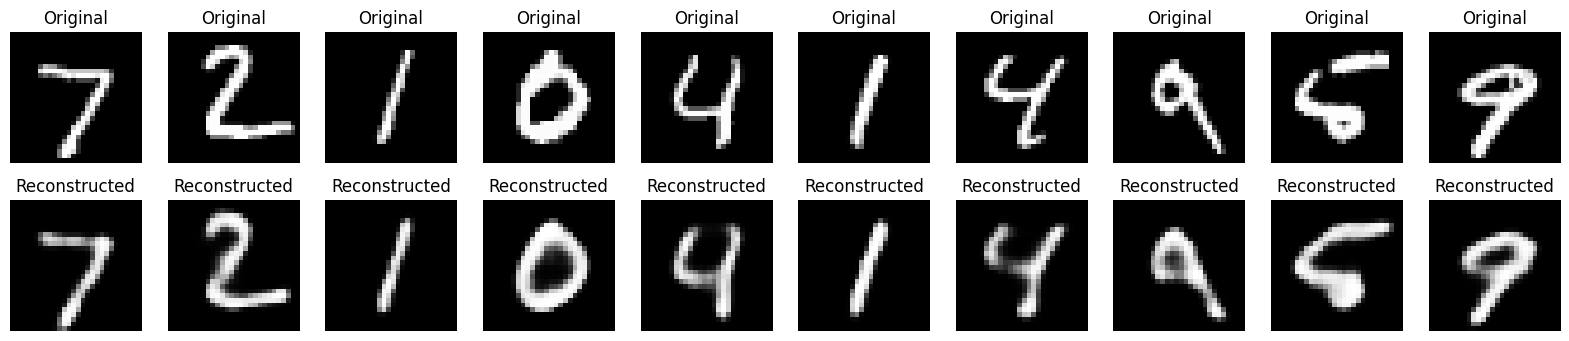

In [15]:
# Plot original and reconstructed images
n = 10 # Number of imagesto display
plt.figure(figsize=(20, 4))
for i in range(n):
# Display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
  plt.title("Original")
  plt.axis("off")
  # Display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(encoded_imgs[i].reshape(28, 28), cmap='gray')
  plt.title("Reconstructed")
  plt.axis("off")
plt.show()

In [17]:
# Train the autoencoder and save the history
history = autoencoder.fit(x_train, x_train,
epochs=50,
batch_size=256,
shuffle=True,
validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1022 - val_loss: 0.1008
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1020 - val_loss: 0.1006
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1014 - val_loss: 0.1002
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1015 - val_loss: 0.0999
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1012 - val_loss: 0.1000
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1008 - val_loss: 0.0994
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1009 - val_loss: 0.0995
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1003 - val_loss: 0.0990
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1003 - val_loss: 0.0990
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1002 - val_loss: 0.0986
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1002 - val_loss: 0.0985
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

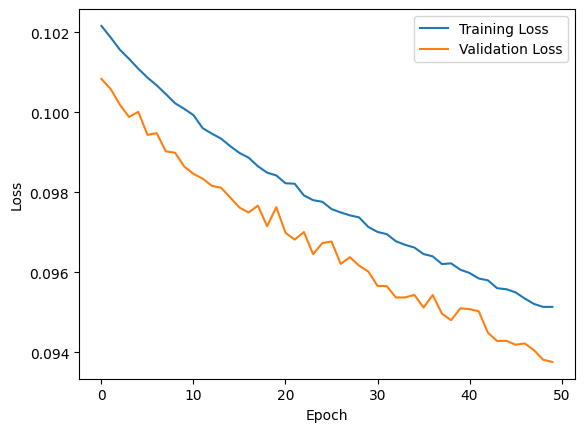

In [18]:
# Now plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')

70
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()